# Modelagem de tópicos
### corpus: teses e dissertações 2014

## Bibliotecas utilizadas

In [1]:
import re
from gensim import models, corpora
from nltk import word_tokenize
from nltk.corpus import stopwords

import nltk
from nltk.probability import FreqDist

import csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#TRANSFORMAR SIGLAS POPULARES EM PALAVRAS

def conversao_termos(texto):
    texto = re.sub(" museus "," museu ",texto.lower())
    texto = re.sub(" abc "," academia brasileira de ciência ",texto.lower())
    texto = re.sub(" ai "," arquitetura da informação ",texto.lower())
    texto = re.sub(" ala "," american library association ",texto.lower())
    texto = re.sub(" ala "," american library association ",texto.lower())
    texto = re.sub(" american society for information science and Technology "," asist ",texto.lower())
    texto = re.sub(" annual review of information science and technology "," arist ",texto.lower())
    texto = re.sub(" aoi "," arquitetura e organização da informação ",texto.lower())
    texto = re.sub(" associação brasileira de educação em ciência da informação "," abecin ",texto.lower())
    texto = re.sub(" associação brasileira de ensino de biblioteconomia e documentação "," abebd ",texto.lower())
    texto = re.sub(" associação brasileira de normas técnicas "," abnt ",texto.lower())
    texto = re.sub(" associação nacional de pesquisa e pós-graduação em ciência da informação "," ancib ",texto.lower())
    texto = re.sub(" base de dados referencial de artigos de periódicos em ciência da informação "," brapci ",texto.lower())
    texto = re.sub(" bci "," biblioteconomia e ciência da informação ",texto.lower())
    texto = re.sub(" biblioteca digital de teses e dissertações "," bdtd ",texto.lower())
    texto = re.sub(" bn "," biblioteca nacional ",texto.lower())
    texto = re.sub(" bu "," biblioteca universitária ",texto.lower())
    texto = re.sub(" c&t "," ciência e tecnologia ",texto.lower())
    texto = re.sub(" cc "," ciência da computação ",texto.lower())
    texto = re.sub(" ccn "," catálogo coletivo nacional ",texto.lower())
    texto = re.sub(" cdd "," classificação decimal de dewey ",texto.lower())
    texto = re.sub(" cdu "," classificação decimal universal ",texto.lower())
    texto = re.sub(" cdu "," classificação decimal universal ",texto.lower())
    texto = re.sub(" cepe "," conselho de extensão e pesquisa ",texto.lower())
    texto = re.sub(" cepe "," conselho de extensão e pesquisa ",texto.lower())
    texto = re.sub(" ci "," ciência da informação ",texto.lower())
    texto = re.sub(" ci:"," ciência da informação ",texto.lower()) 
    texto = re.sub(" ci,"," ciência da informação ",texto.lower())
    texto = re.sub(" cms "," content management system ",texto.lower())
    texto = re.sub(" cne "," conselho nacional de educação ",texto.lower())
    texto = re.sub(" conselho nacional de desenvolvimento científico e tecnológico "," cnpq ",texto.lower())
    texto = re.sub(" coordenação de aperfeiçoamento de pessoal de nível superior "," capes ",texto.lower())
    texto = re.sub(" coordenação de aperfeiçoamento de pessoal de nível superior "," capes ",texto.lower())
    texto = re.sub(" crm "," customer relationship management ",texto.lower())
    texto = re.sub(" dc "," dublin core ",texto.lower())
    texto = re.sub(" descriptive ontology for linguistic and cognitive engineering "," dolce ",texto.lower())
    texto = re.sub(" ead "," educação à distância ",texto.lower())
    texto = re.sub(" eci "," escola de ciência da informação ",texto.lower())
    texto = re.sub(" enade "," exame nacional de desempenho ",texto.lower())
    texto = re.sub(" encontro nacional de pesquisa em ciência da informação "," enancib ",texto.lower())
    texto = re.sub(" fgv "," Fundação Getúlio Vargas ",texto.lower())
    texto = re.sub(" fiocruz "," fundação oswaldo cruz ",texto.lower())
    texto = re.sub(" ftp "," file transfer protocol ",texto.lower())
    texto = re.sub(" fundação brasileira à pesquisa do estudo de minas gerais "," fapemig ",texto.lower())
    texto = re.sub(" fundação brasileira à pesquisa do estudo de são paulo "," fapesp ",texto.lower())
    texto = re.sub(" fundação brasileira à pesquisa do estudo do rio de janeiro "," faperj ",texto.lower())
    texto = re.sub(" fundação de amparo às pesquisas "," faps ",texto.lower())
    texto = re.sub(" gic "," gestão da informação e conhecimento ",str(texto.lower()))
    texto = re.sub(" gic "," gestão da informação e do conhecimento ",texto.lower())
    texto = re.sub(" gpl "," general public licence ",texto.lower())
    texto = re.sub(" hypertext markup language limguagem "," html ",texto.lower())
    texto = re.sub(" ia "," inteligência artificial ",texto.lower())
    texto = re.sub(" ibpc "," instituto brasileiro do patrimônio cultural ",texto.lower())
    texto = re.sub(" ibpc "," instituto brasileiro do patrimônio cultural ",texto.lower())
    texto = re.sub(" ics "," informação cultura e sociedade ",texto.lower())
    texto = re.sub(" ict "," informação, ciência e tecnologia ",texto.lower())
    texto = re.sub(" idh "," índice de desenvolvimento humano ",texto.lower())
    texto = re.sub(" ies "," instituição de ensino superior ",texto.lower())
    texto = re.sub(" information science and technology abstracts "," ista ",texto.lower())
    texto = re.sub(" instituto brasileiro de bibliografia e documentação "," ibbd ",texto.lower())
    texto = re.sub(" instituto brasileiro de geografia e estatística "," ibge ",texto.lower())
    texto = re.sub(" instituto brasileiro de informação em ciência e tecnologia "," ibict ",texto.lower())
    texto = re.sub(" instituto de ciência da informação "," ici ",texto.lower())
    texto = re.sub(" instituto nacional de estudos e pesquisas educacionais anísio teixeira "," inep ",texto.lower())
    texto = re.sub(" instituto universitário de pesquisa do rio de janeiro "," iuoerj ",texto.lower())
    texto = re.sub(" international federation of library associations and institutions "," ifla ",texto.lower())
    texto = re.sub(" international standard book number "," isbn ",texto.lower())
    texto = re.sub(" international standard serial number "," issn ",texto.lower())
    texto = re.sub(" isi "," institute for scientific information ",texto.lower())
    texto = re.sub(" iso "," international organization for standardization ",texto.lower())
    texto = re.sub(" it "," informação e tecnologia ",texto.lower())
    texto = re.sub(" jcr "," journal citation reports ",texto.lower())
    texto = re.sub(" jstor "," journal storage ",texto.lower())
    texto = re.sub(" kos "," sistemas de organização do conhecimento ",texto.lower())
    texto = re.sub(" lc "," linguagem cinzenta ",texto.lower())
    texto = re.sub(" ld "," linguagem documentária ",texto.lower())
    texto = re.sub(" ldb "," lei de diretrizes e bases ",texto.lower())
    texto = re.sub(" library and informations science abstracts "," lisa ",texto.lower())
    texto = re.sub(" ln "," linguagem natural ",texto.lower())
    texto = re.sub(" lod "," linked open data ",texto.lower())
    texto = re.sub(" marc "," machine readable cataloging ",texto.lower())
    texto = re.sub(" mdi "," multiple document interface ",texto.lower())
    texto = re.sub(" mec "," ministério da educação ",texto.lower())
    texto = re.sub(" npd "," núcleo de pesquisa e documentação ",texto.lower())
    texto = re.sub(" oai "," open archives iniciative ",texto.lower())
    texto = re.sub(" oc "," organização do conhecimento ",texto.lower())
    texto = re.sub(" ocr "," optical character recognition ",texto.lower())
    texto = re.sub(" oi "," organização da informação ",texto.lower())
    texto = re.sub(" ojs "," open journal systems ",texto.lower())
    texto = re.sub(" ong "," organização não-governamental ",texto.lower())
    texto = re.sub(" onu "," organização das nações unidas ",texto.lower())
    texto = re.sub(" organização das nações unidas para a educação e cultura "," unesco ",texto.lower())
    texto = re.sub(" osi "," open society institute ",texto.lower())
    texto = re.sub(" oui "," organização e uso da informação ",texto.lower())
    texto = re.sub(" owl "," web ontology language ",texto.lower())
    texto = re.sub(" pln "," processamento de linguagem natural ",texto.lower())
    texto = re.sub(" plos "," public library of science ",texto.lower())
    texto = re.sub(" poi "," produção e organização da informação ",texto.lower())
    texto = re.sub(" pontifícia universidade católica de minas gerais "," puc mg ",texto.lower())
    texto = re.sub(" pontifícia universidade católica de são paulo "," puc sp ",texto.lower())
    texto = re.sub(" pontifícia universidade católica do rio de janeiro "," puc rj ",texto.lower())
    texto = re.sub(" pontifícia universidade católica do rio grande do sul "," puc rs ",texto.lower())
    texto = re.sub(" ppg "," programa de pós-graduação ",texto.lower())
    texto = re.sub(" programa de pós-graduação em ciência da informação "," ppgci ",texto.lower())
    texto = re.sub(" programa de pós-graduação em ciências sociais "," ppgcs ",texto.lower())
    texto = re.sub(" programa de pós-graduação em sociologia "," ppgs ",texto.lower())
    texto = re.sub(" rc "," representação do conhecimento ",texto.lower())
    texto = re.sub(" rdf "," resource description framework ",texto.lower())
    texto = re.sub(" ri "," recuperação da informação ",texto.lower())
    texto = re.sub(" ri "," recuperação da informação ",texto.lower())
    texto = re.sub(" sad "," sistema de apoio à decisão ",texto.lower())
    texto = re.sub(" sci "," science citation index ",texto.lower())
    texto = re.sub(" scientific electronic library online "," scielo",texto.lower())
    texto = re.sub(" sdr "," zona de desenvolvimento real ",texto.lower())
    texto = re.sub(" serviço central de informação bibliográfica "," scib ",texto.lower())
    texto = re.sub(" serviço nacional de aprendizagem comercial "," senac ",texto.lower())
    texto = re.sub(" serviço nacional de aprendizagem industrial "," senai ",texto.lower())
    texto = re.sub(" serviço social da indústria "," sesi ",texto.lower())
    texto = re.sub(" serviço social do comércio "," sesc ",texto.lower())
    texto = re.sub(" sesi "," serviço social da indústria ",texto.lower())
    texto = re.sub(" sibi "," sistema integrado de bibliotecas ",texto.lower())
    texto = re.sub(" sig "," sistema de informação gerencial ",texto.lower())
    texto = re.sub(" snad "," secretária nacional de políticas anti-drogas ",texto.lower())
    texto = re.sub(" snpq "," sistema nacional de pós-graduação",texto.lower())
    texto = re.sub(" soc "," sistemas de organização do conhecimento ",texto.lower())
    texto = re.sub(" sri "," sistema de recuperação da informação ",texto.lower())
    texto = re.sub(" ssd "," sistema de suporte à decisão ",texto.lower())
    texto = re.sub(" tcc "," trabalho de conclusão de curso ",texto.lower())
    texto = re.sub(" universidade federal de minas gerais "," ufmg ",texto.lower())
    texto = re.sub(" universidade federal de ouro preto "," ufop ",texto.lower())
    texto = re.sub(" universidade federal de pernambuco "," ufpe ",texto.lower())
    texto = re.sub(" universidade federal de santa caratina "," ufsc ",texto.lower())
    texto = re.sub(" universidade federal de são carlos "," ufscar ",texto.lower())
    texto = re.sub(" universidade federal de sergipe "," ufs ",texto.lower())
    texto = re.sub(" universidade federal de viçosa "," ufv ",texto.lower())
    texto = re.sub(" universidade federal do ceará "," ufc ",texto.lower())
    texto = re.sub(" universidade federal do estado do rio de janeiro "," unirio ",texto.lower())
    texto = re.sub(" universidade federal do maranhão "," ufma ",texto.lower())
    texto = re.sub(" universidade federal do pará "," ufpa ",texto.lower())
    texto = re.sub(" universidade federal do paraná "," ufpr ",texto.lower())
    texto = re.sub(" universidade federal do rio de janeiro "," ufrj ",texto.lower())
    texto = re.sub(" universidade federal do rio grande do norte "," ufrn ",texto.lower())
    texto = re.sub(" universidade federal do rio grande do sul  "," ufrgs ",texto.lower())
    texto = re.sub(" universidade federal fluminense "," uff ",texto.lower())
    texto = re.sub(" universidade federal rural do rio de janeiro "," ufrrj ",texto.lower())
    texto = re.sub(" uri "," uniform resource identifier ",texto.lower())
    texto = re.sub(" world wide web consortium "," w3c ",texto.lower())
    texto = re.sub(" xml "," extensible markup language ",texto.lower())
    texto = re.sub(" zpd "," zona de desenvolvimento proximal ",texto.lower())
    texto = re.sub(" citações "," citação ",texto.lower())
    texto = re.sub(" links "," link ",texto.lower())
   #texto = re.sub(" museus "," museu ",texto.lower())
    texto = re.sub("museus","museu",texto.lower())
    texto = re.sub(" literacy "," alfabetização ",texto.lower())  
    texto = re.sub(" bibliotecas "," biblioteca ",texto.lower())
    texto = re.sub(" informações "," informação ",texto.lower())
    texto = re.sub(" information "," informação ",texto.lower())
    texto = re.sub(" bibliographia "," bibliografia ",texto.lower())
    texto = re.sub(" termos "," termo ",texto.lower())
    texto = re.sub(" knowledge "," conhecimento ",texto.lower())  
    texto = re.sub(" accessibility "," acessibilidade ",texto.lower())  
    texto = re.sub(" research "," pesquisa ",texto.lower()) 
    texto = re.sub(" image "," imagem ",texto.lower()) 
    texto = re.sub(" archivists "," arquivistas ",texto.lower()) 
    texto = re.sub("-se", "", texto.lower())
    texto = re.sub(" se ", "", texto.lower())
    texto = re.sub("-lo ", "", texto.lower())
    texto = re.sub("-la ", "", texto.lower())
    texto = re.sub(" lo ", "", texto.lower())
    texto = re.sub(" la ", "", texto.lower())
    texto = re.sub(" los ", "", texto.lower())
    texto = re.sub(" las ", "", texto.lower())
    return texto


In [3]:
#CONFIGURANDO STOP_WORDS

stop_words = set(stopwords.words('portuguese'))
stop_words_us =  set(stopwords.words('english'))
stop_words_us =  set(stopwords.words('spanish'))

#ADICIONAR INSERÇÕES DE PALAVRAS DE PARADA
new_stopwords = ['tais','xviii','jan.',' jul.',' jan ','and','the','acho','lo','pra','é','onde','senão','quanto','outros','sobre','sobretudo','ser','ainda','quais','desse','assim','tal','através','podemos','portanto','pode','tanto','alguns','possível','p.','v','p','-se','se',' se','nesse','nessa','neste','nesta','http','https','disponível','acesso','sendo','marília','rio','dessa','diz','respeito','finais','considerações','desta','belo horizointe','janeiro','fevereiro','março','abril','maio','junho','julho','agosto','setembro','outubro','novembro','dezembro','porto alegre','outro','xix','londrina','paulista','xvii','sentido','maior','bem','ter','deve','devem','entretanto','fazer','todo','tipo','exemplo','pois','apenas','utilizado','utilizados','acordo','casa','figura','cada','tese','acesso','partir','parte','segundo','autor','outras','podem','vez','todos','então','sim','todas','apresenta','algumas','outra','lo','la','-lo','-la','porque','por que','os','etc','jan','fev','mar','abr','mai','jun','jul','ago','set','out','nov','dez','então','aqui','enancib']


stop_words.update(new_stopwords)
stop_words.update(stop_words_us)
new_stopwords_list = set(stop_words)

In [4]:
#SETAR DOCUMENTO A SER LIDO

#CAMINHO DO ARQUIVO
data = []
pasta = "corpus_tesesdissertacoes_2014"
caminho="" + pasta

arquivo = open(caminho + ".txt", "r",encoding="utf-8")

In [5]:
#LEITURA DO CORPUS

x=0
for fileid in arquivo:
    document = fileid
    document = conversao_termos(document)

#    document=re.sub(" encontro nacional de pesquisa em ciência da informação "," enancib ",str(document.lower()))
    data.append(document)

NO_DOCUMENTS = len(data)
print(NO_DOCUMENTS)

282


In [6]:
#RESULTADO PARA VERIFICAÇÃO DE CONVERSÃO DE SIGLAS E LEITURA DE TEXTO CONTIDO NO CORPUS

print(data[1])

[' universidade de brasília – unb faculdade de ciência da informação – fci ppgci - ppgcinf  alessandra silva de souza           comunicação e mediação da informação no desenvolvimento do jogo eletrônico                  brasília, df 2014  alessandra silva de souza             comunicação e mediação da informação no desenvolvimento do jogo eletrônico       dissertação apresentada ao ppgci da universidade de brasília – unb, como requisito para obtenção do grau de mestre em ciência da informação.             brasília, df 2014                                      s719c souza, alessandra silva de.  comunicação e mediação da informação no desenvolvimento do jogo eletrônico  / alessandra silva de souza. – 2014. 107 f.; 30 cm.     orientadora: prof.ª dr.ª ivette kafure.   dissertação (mestrado) – universidade de brasília, faculdade de ciência da informação, programa de pós-graduação em ciência da informação, brasília, 2014.   1. jogos eletrônicos. 2. desenvolvedores de jogos. 3. comunicação e 

In [7]:
#FUNÇÃO BIGRAMA E TRIGRAMA

def bigramas(words):
 
    bigrams = []
 
    for i in range(0, len(words)):
        if (i == len(words)-1):
            break
        else:
            bigrama_obs = words[i] + '_' + words[i+1]
            bigrams.append(bigrama_obs)
 
    return bigrams

def trigramas(words):
 
    trigrams = []
 
    for i in range(0, len(words)):
        if (i == len(words)-2):
            break
        else:
            trigrama_obs = words[i] + '_' + words[i+1] + '_' + words[i+2]
            trigrams.append(trigrama_obs)
 
    return trigrams

In [8]:
# TOKENIZAR O DOCUMENTO E FAZER A STOPWORDS

def clean_text(text):
    tokenized_text = word_tokenize(text.lower())
    cleaned_text = [t for t in tokenized_text if t not in stop_words and re.match('[a-zA-Z\-][a-zA-Z\-]{2,}', t)]
    return cleaned_text
 
tokenized_data = []
texto2 = []
total_unigramas = []
total_bigramas = []
total_trigramas = []

for text in data:
    xtexto = clean_text(text)

#CRIAR O UNIGRAMA, BIGRAMAS, TRIGRAMAS
    unigramas = xtexto
    xbigramas = bigramas(xtexto)
    xtrigramas = trigramas(xtexto)
    xunigramas = unigramas + xbigramas + xtrigramas
    
    tokenized_data.append(xunigramas)
    texto2 = texto2 + xunigramas

#CRIAR OPÇÃO PARA MOSTRAR A FREQUENCIA SOMENTE DE UNIGRAMA , BIGRAMAS E TRIGRAMAS
    total_unigramas = total_unigramas + unigramas
    total_bigramas = total_bigramas + xbigramas
    total_trigramas = total_trigramas + xtrigramas
    
xfrequencia = texto2

In [9]:
#TOTAL DE UNIGRAMAS, BIGRAMAS E TRIGRAMAS
print("Total de Unigramas: "+ str((len(total_unigramas))))
print("Total de Bigramas: "+ str((len(total_bigramas))))
print("Total de Trigramas: "+ str((len(total_trigramas))))

Total de Unigramas: 6670028
Total de Bigramas: 6669746
Total de Trigramas: 6669464


In [10]:
#CELULA EXTRA - VERIFICAR TEXTO TOKENIZADO com n-gramas
print(tokenized_data[1])

['universidade', 'brasília', 'unb', 'faculdade', 'informação', 'fci', 'ppgci', 'ppgcinf', 'alessandra', 'silva', 'souza', 'comunicação', 'mediação', 'informação', 'desenvolvimento', 'jogo', 'eletrônico', 'brasília', 'alessandra', 'silva', 'souza', 'comunicação', 'mediação', 'informação', 'desenvolvimento', 'jogo', 'eletrônico', 'dissertação', 'apresentada', 'ppgci', 'universidade', 'brasília', 'unb', 'requisito', 'obtenção', 'grau', 'mestre', 'informação', 'brasília', 'souza', 'alessandra', 'silva', 'comunicação', 'mediação', 'informação', 'desenvolvimento', 'jogo', 'eletrônico', 'alessandra', 'silva', 'souza', 'orientadora', 'prof.ª', 'ivette', 'kafure', 'dissertação', 'mestrado', 'universidade', 'brasília', 'faculdade', 'informação', 'programa', 'informação', 'brasília', 'jogos', 'eletrônicos', 'desenvolvedores', 'jogos', 'comunicação', 'mediação', 'informação', 'trabalho', 'colaborativo', 'kafure', 'ivette', 'classificação', 'decimal', 'universal', 'dedico', 'trabalho', 'alexandre',

# CRIANDO A FREQUÊNCIA

In [11]:
#MOSTRA A FREQUENCIA EM ORDEM - FREQUENCIA GERAL
num_freq = 1000
fdist = FreqDist(xfrequencia)
fdist.pprint(num_freq)
xfreq = fdist
nome_arquivo = "freq_geral_tesesdissertacoes_2014"

#GUARDA EM UM CSV A FREQUENCIA GERAL 
import csv
# GUARDA O CORPUS EM UM CSV SEPARADO POR TABULAÇÃO
with open(nome_arquivo + ".csv", "w", newline='') as fp:
    writer = csv.writer(fp,delimiter = ',')
    writer.writerows(fdist.most_common(num_freq))

#MOSTRA AS FREQUÊNCIAS POR LINHA
print("\n  PALAVRA -- FREQUÊNCIA")
fdist.most_common(num_freq)

FreqDist({'informação': 108609, 'pesquisa': 31935, 'conhecimento': 27061, 'forma': 21569, 'dados': 20225, 'processo': 19465, 'biblioteca': 17974, 'social': 17068, 'trabalho': 15861, 'relação': 15031, 'comunicação': 13925, 'brasil': 13706, 'uso': 13490, 'produção': 13013, 'organização': 12977, 'meio': 12926, 'desenvolvimento': 12367, 'sistema': 12209, 'museu': 12205, 'sociedade': 11926, 'sociais': 11914, 'cultura': 11858, 'documentos': 11600, 'busca': 11380, 'termo': 11279, 'memória': 10962, 'estudo': 10877, 'tempo': 10844, 'fonte': 10363, 'nacional': 10267, 'educação': 10266, 'paulo': 9981, 'usuários': 9893, 'anos': 9823, 'pessoas': 9728, 'contexto': 9656, 'construção': 9451, 'universidade': 9379, 'história': 9023, 'estudos': 8979, 'mundo': 8864, 'atividades': 8740, 'caso': 8629, 'gestão': 8570, 'campo': 8417, 'diferentes': 8357, 'base': 8196, 'vida': 8163, 'grande': 8146, 'sistemas': 8027, 'espaço': 8002, 'modo': 7985, 'relações': 7974, 'científica': 7950, 'grupo': 7868, 'modelo': 781


  PALAVRA -- FREQUÊNCIA


[('informação', 108609),
 ('pesquisa', 31935),
 ('conhecimento', 27061),
 ('forma', 21569),
 ('dados', 20225),
 ('processo', 19465),
 ('biblioteca', 17974),
 ('social', 17068),
 ('trabalho', 15861),
 ('relação', 15031),
 ('comunicação', 13925),
 ('brasil', 13706),
 ('uso', 13490),
 ('produção', 13013),
 ('organização', 12977),
 ('meio', 12926),
 ('desenvolvimento', 12367),
 ('sistema', 12209),
 ('museu', 12205),
 ('sociedade', 11926),
 ('sociais', 11914),
 ('cultura', 11858),
 ('documentos', 11600),
 ('busca', 11380),
 ('termo', 11279),
 ('memória', 10962),
 ('estudo', 10877),
 ('tempo', 10844),
 ('fonte', 10363),
 ('nacional', 10267),
 ('educação', 10266),
 ('paulo', 9981),
 ('usuários', 9893),
 ('anos', 9823),
 ('pessoas', 9728),
 ('contexto', 9656),
 ('construção', 9451),
 ('universidade', 9379),
 ('história', 9023),
 ('estudos', 8979),
 ('mundo', 8864),
 ('atividades', 8740),
 ('caso', 8629),
 ('gestão', 8570),
 ('campo', 8417),
 ('diferentes', 8357),
 ('base', 8196),
 ('vida', 816

In [12]:
#MOSTRA A FREQUENCIA EM ORDEM - FREQUENCIA UNIGRAMA
num_freq = 1000
fdist = FreqDist(total_unigramas)
fdist.pprint(num_freq)
xfreq = fdist
nome_arquivo = "freq_unigrama_tesesdissertacoes_2014"

#GUARDA EM UM CSV A FREQUENCIA GERAL 
import csv
# GUARDA O CORPUS EM UM CSV SEPARADO POR TABULAÇÃO
with open(nome_arquivo + ".csv", "w", newline='') as fp:
    writer = csv.writer(fp,delimiter = ',')
    writer.writerows(fdist.most_common(num_freq))

#MOSTRA AS FREQUÊNCIAS POR LINHA
print("\n  PALAVRA -- FREQUÊNCIA")
fdist.most_common(num_freq)

FreqDist({'informação': 108609, 'pesquisa': 31935, 'conhecimento': 27061, 'forma': 21569, 'dados': 20225, 'processo': 19465, 'biblioteca': 17974, 'social': 17068, 'trabalho': 15861, 'relação': 15031, 'comunicação': 13925, 'brasil': 13706, 'uso': 13490, 'produção': 13013, 'organização': 12977, 'meio': 12926, 'desenvolvimento': 12367, 'sistema': 12209, 'museu': 12205, 'sociedade': 11926, 'sociais': 11914, 'cultura': 11858, 'documentos': 11600, 'busca': 11380, 'termo': 11279, 'memória': 10962, 'estudo': 10877, 'tempo': 10844, 'fonte': 10363, 'nacional': 10267, 'educação': 10266, 'paulo': 9981, 'usuários': 9893, 'anos': 9823, 'pessoas': 9728, 'contexto': 9656, 'construção': 9451, 'universidade': 9379, 'história': 9023, 'estudos': 8979, 'mundo': 8864, 'atividades': 8740, 'caso': 8629, 'gestão': 8570, 'campo': 8417, 'diferentes': 8357, 'base': 8196, 'vida': 8163, 'grande': 8146, 'sistemas': 8027, 'espaço': 8002, 'modo': 7985, 'relações': 7974, 'científica': 7950, 'grupo': 7868, 'modelo': 781

[('informação', 108609),
 ('pesquisa', 31935),
 ('conhecimento', 27061),
 ('forma', 21569),
 ('dados', 20225),
 ('processo', 19465),
 ('biblioteca', 17974),
 ('social', 17068),
 ('trabalho', 15861),
 ('relação', 15031),
 ('comunicação', 13925),
 ('brasil', 13706),
 ('uso', 13490),
 ('produção', 13013),
 ('organização', 12977),
 ('meio', 12926),
 ('desenvolvimento', 12367),
 ('sistema', 12209),
 ('museu', 12205),
 ('sociedade', 11926),
 ('sociais', 11914),
 ('cultura', 11858),
 ('documentos', 11600),
 ('busca', 11380),
 ('termo', 11279),
 ('memória', 10962),
 ('estudo', 10877),
 ('tempo', 10844),
 ('fonte', 10363),
 ('nacional', 10267),
 ('educação', 10266),
 ('paulo', 9981),
 ('usuários', 9893),
 ('anos', 9823),
 ('pessoas', 9728),
 ('contexto', 9656),
 ('construção', 9451),
 ('universidade', 9379),
 ('história', 9023),
 ('estudos', 8979),
 ('mundo', 8864),
 ('atividades', 8740),
 ('caso', 8629),
 ('gestão', 8570),
 ('campo', 8417),
 ('diferentes', 8357),
 ('base', 8196),
 ('vida', 816

In [13]:
#MOSTRA A FREQUENCIA EM ORDEM - FREQUENCIA BIGRAMA
num_freq = 1000
fdist = FreqDist(total_bigramas)
fdist.pprint(num_freq)
xfreq = fdist
nome_arquivo = "freq_bigrama_tesesdissertacoes_2014"

#GUARDA EM UM CSV A FREQUENCIA GERAL 
import csv
# GUARDA O CORPUS EM UM CSV SEPARADO POR TABULAÇÃO
with open(nome_arquivo + ".csv", "w", newline='') as fp:
    writer = csv.writer(fp,delimiter = ',')
    writer.writerows(fdist.most_common(num_freq))

#MOSTRA AS FREQUÊNCIAS POR LINHA
print("\n  PALAVRA -- FREQUÊNCIA")
fdist.most_common(num_freq)

FreqDist({'universidade_federal': 3147, 'recuperação_informação': 2737, 'informação_conhecimento': 2401, 'uso_informação': 1958, 'redes_sociais': 1891, 'fontes_informação': 1873, 'muitas_vezes': 1751, 'produção_científica': 1726, 'informação_tecnologia': 1685, 'base_dados': 1682, 'bases_dados': 1661, 'gestão_informação': 1659, 'ponto_vista': 1656, 'coleta_dados': 1626, 'belo_horizonte': 1584, 'dissertação_mestrado': 1572, 'informação_science': 1563, 'arquitetura_informação': 1536, 'informação_informação': 1504, 'organização_conhecimento': 1452, 'ensino_superior': 1418, 'dados_pesquisa': 1414, 'sistemas_informação': 1413, 'porto_alegre': 1373, 'busca_informação': 1347, 'informação_comunicação': 1251, 'tecnologias_informação': 1207, 'tendo_vista': 1158, 'sociedade_informação': 1133, 'comunicação_científica': 1114, 'organização_informação': 1073, 'necessidades_informação': 1062, 'fonte_dados': 1038, 'direitos_humanos': 1025, 'competência_informacional': 1000, 'patrimônio_cultural': 974, '


  PALAVRA -- FREQUÊNCIA


[('universidade_federal', 3147),
 ('recuperação_informação', 2737),
 ('informação_conhecimento', 2401),
 ('uso_informação', 1958),
 ('redes_sociais', 1891),
 ('fontes_informação', 1873),
 ('muitas_vezes', 1751),
 ('produção_científica', 1726),
 ('informação_tecnologia', 1685),
 ('base_dados', 1682),
 ('bases_dados', 1661),
 ('gestão_informação', 1659),
 ('ponto_vista', 1656),
 ('coleta_dados', 1626),
 ('belo_horizonte', 1584),
 ('dissertação_mestrado', 1572),
 ('informação_science', 1563),
 ('arquitetura_informação', 1536),
 ('informação_informação', 1504),
 ('organização_conhecimento', 1452),
 ('ensino_superior', 1418),
 ('dados_pesquisa', 1414),
 ('sistemas_informação', 1413),
 ('porto_alegre', 1373),
 ('busca_informação', 1347),
 ('informação_comunicação', 1251),
 ('tecnologias_informação', 1207),
 ('tendo_vista', 1158),
 ('sociedade_informação', 1133),
 ('comunicação_científica', 1114),
 ('organização_informação', 1073),
 ('necessidades_informação', 1062),
 ('fonte_dados', 1038),
 

In [14]:
#MOSTRA A FREQUENCIA EM ORDEM - FREQUENCIA TRIGRAMA
num_freq = 1000
fdist = FreqDist(total_trigramas)
fdist.pprint(num_freq)
xfreq = fdist
nome_arquivo = "freq_trigrama_tesesdissertacoes_2014"

#GUARDA EM UM CSV A FREQUENCIA GERAL 
import csv
# GUARDA O CORPUS EM UM CSV SEPARADO POR TABULAÇÃO
with open(nome_arquivo + ".csv", "w", newline='') as fp:
    writer = csv.writer(fp,delimiter = ',')
    writer.writerows(fdist.most_common(num_freq))

#MOSTRA AS FREQUÊNCIAS POR LINHA
print("\n  PALAVRA -- FREQUÊNCIA")
fdist.most_common(num_freq)

FreqDist({'fonte_dados_pesquisa': 834, 'tecnologias_informação_comunicação': 701, 'fonte_elaborado_autora': 598, 'museu_histórico_nacional': 524, 'dissertação_mestrado_informação': 477, 'portal_periódicos_capes': 437, 'universidade_federal_paraíba': 420, 'fotografias_obras_arte': 420, 'domínio_escopo_mpeg7': 406, 'informação_universidade_federal': 382, 'universidade_federal_grande': 381, 'resource_description_framework': 375, 'society_informação_science': 342, 'american_society_informação': 341, 'informação_belo_horizonte': 334, 'instituição_ensino_superior': 330, 'universidade_federal_santa': 327, 'federal_grande_sul': 315, 'sistemas_organização_conhecimento': 312, 'web_ontology_language': 311, 'informação_science_technology': 310, 'busca_uso_informação': 302, 'universidade_federal_bahia': 295, 'federal_santa_catarina': 295, 'federal_minas_gerais': 286, 'encontro_nacional_pesquisa': 283, 'nacional_pesquisa_informação': 279, 'instituições_federais_ensino': 269, 'instituições_ensino_sup


  PALAVRA -- FREQUÊNCIA


[('fonte_dados_pesquisa', 834),
 ('tecnologias_informação_comunicação', 701),
 ('fonte_elaborado_autora', 598),
 ('museu_histórico_nacional', 524),
 ('dissertação_mestrado_informação', 477),
 ('portal_periódicos_capes', 437),
 ('universidade_federal_paraíba', 420),
 ('fotografias_obras_arte', 420),
 ('domínio_escopo_mpeg7', 406),
 ('informação_universidade_federal', 382),
 ('universidade_federal_grande', 381),
 ('resource_description_framework', 375),
 ('society_informação_science', 342),
 ('american_society_informação', 341),
 ('informação_belo_horizonte', 334),
 ('instituição_ensino_superior', 330),
 ('universidade_federal_santa', 327),
 ('federal_grande_sul', 315),
 ('sistemas_organização_conhecimento', 312),
 ('web_ontology_language', 311),
 ('informação_science_technology', 310),
 ('busca_uso_informação', 302),
 ('universidade_federal_bahia', 295),
 ('federal_santa_catarina', 295),
 ('federal_minas_gerais', 286),
 ('encontro_nacional_pesquisa', 283),
 ('nacional_pesquisa_informaçã

## Gráfico

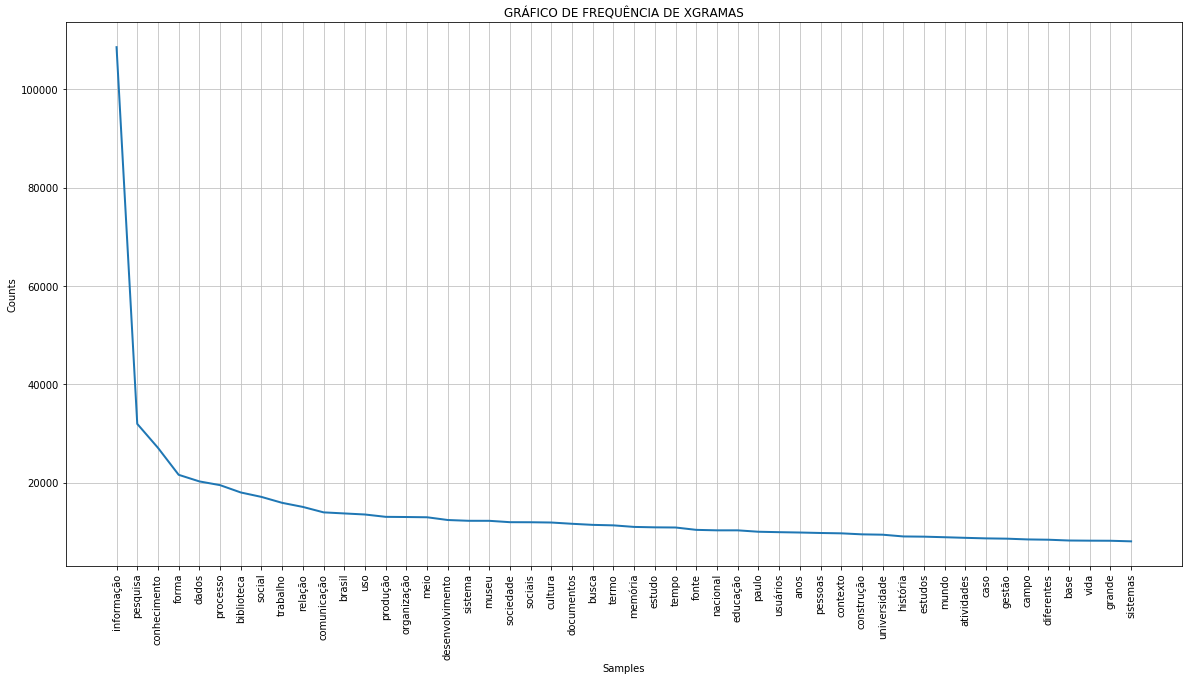

In [15]:
# MOSTRAR O GRÁFICO 

num_freq = 50
#fdist.figure(figsize=(30, 20))
arquivo_grafico = xfrequencia #mudar a variável para representações xgramas v1: total_unigramas v2: total_bigramas v3: total_trigramas v4: xfrequencia
fdist = FreqDist(arquivo_grafico)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,10)) 
fdist.plot(num_freq,cumulative=False,title='GRÁFICO DE FREQUÊNCIA DE XGRAMAS')

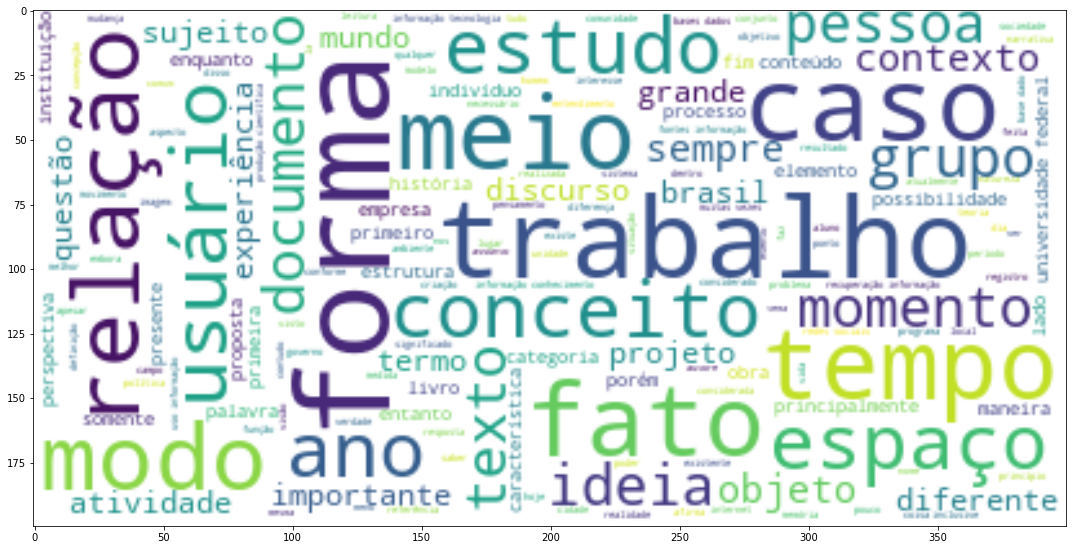

In [16]:
#NUVEM DE PALAVRAS

from wordcloud import WordCloud
cleaned =  ' '.join(xfrequencia)
num_freq = 250
wordcloud = WordCloud(max_font_size=50, max_words=num_freq, background_color="white").generate(cleaned)
fig, ax = plt.subplots(figsize=(15, 20))
ax.imshow(wordcloud, interpolation='nearest')
plt.imshow(wordcloud, interpolation="bilinear")
plt.tight_layout()
plt.savefig("tesesdissertacoes_nuv_2014.png", format = "png")

# CRIANDO O DICIONÁRIO E O CORPUS

In [17]:
#CRIAR DICIONÁRIO 
dictionary = corpora.Dictionary(tokenized_data)
 
#TRANSFORMAR A COLEÇÃO TEXTO COM ID
corpus = [dictionary.doc2bow(text) for text in tokenized_data]

## Latent Dirichlet Allocation (LDA)

### Modelo LDA - 10 tópicos

In [18]:
print("=========================================== Modelo LDA: 10 TÓPICOS ==================================================\n")
num_topics = 10

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 10 TÓPICOS ==================================================

Wall time: 22min 43s
Tópico 0:  0.000*"qualidade_apresentados" + 0.000*"qualidade_fundamentados" + 0.000*"conceitos_qualidade" + 0.000*"fundamentados" + 0.000*"quantificação" + 0.000*"critérios_qualidade" + 0.000*"qualidade_revistas" + 0.000*"mensuração_quantificação" + 0.000*"conhecimento_analisada" + 0.000*"quantificação_qualidade"
Tópico 1:  0.000*"sns" + 0.000*"indexação_automática" + 0.000*"dark_web" + 0.000*"indexação" + 0.000*"automática" + 0.000*"museu_histórico" + 0.000*"museu_histórico_nacional" + 0.000*"tor" + 0.000*"histórico_nacional" + 0.000*"archival_description"
Tópico 2:  0.000*"informacao" + 0.000*"ciencia_informacao" + 0.000*"teorico" + 0.000*"representacao" + 0.000*"construcao" + 0.000*"multipla" + 0.000*"informacao_ciencia" + 0.000*"representacao_conhecimento" + 0.000*"todesco" + 0.000*"rautenberg"
Tópico 3:  0.001*"transparência" + 0.001*"kaxuyana

### Modelo LDA - 14 tópicos

In [19]:
print("=========================================== Modelo LDA: 14 TÓPICOS ==================================================\n")
num_topics = 14
chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 14 TÓPICOS ==================================================

Wall time: 26min 4s
Tópico 0:  0.000*"neurociências" + 0.000*"univ" + 0.000*"valores-notícia" + 0.000*"valores-notícia_seleção" + 0.000*"jornal_nacional" + 0.000*"ing" + 0.000*"florestal" + 0.000*"univ_fed" + 0.000*"ruralistas" + 0.000*"brasileira_neurociências"
Tópico 1:  0.001*"artigos" + 0.001*"revistas" + 0.001*"indexação" + 0.001*"turismo" + 0.001*"qualidade" + 0.001*"ontologia" + 0.001*"brics" + 0.001*"produção_científica" + 0.001*"scopus" + 0.001*"revista"
Tópico 2:  0.000*"informação" + 0.000*"dados" + 0.000*"reservadas" + 0.000*"vagas" + 0.000*"candidatos" + 0.000*"forma" + 0.000*"vagas_reservadas" + 0.000*"pesquisa" + 0.000*"conhecimento" + 0.000*"produção"
Tópico 3:  0.000*"ecotecnocrática_sustentabilidade" + 0.000*"abordagem_ecotecnocrática" + 0.000*"indústrias_transformação" + 0.000*"imagens_simbólicas" + 0.000*"faber-castell" + 0.000*"belting" + 0.000*"mi

### Modelo LDA - 18 tópicos

In [20]:
print("=========================================== Modelo LDA: 18 TÓPICOS ==================================================\n")
num_topics = 18
chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 18 TÓPICOS ==================================================

Wall time: 39min 14s
Tópico 0:  0.000*"informação" + 0.000*"conhecimento" + 0.000*"forma" + 0.000*"processo" + 0.000*"trabalho" + 0.000*"meio" + 0.000*"memória" + 0.000*"pesquisa" + 0.000*"corpo" + 0.000*"produção"
Tópico 1:  0.000*"dança" + 0.000*"balé" + 0.000*"informação" + 0.000*"bailarinos" + 0.000*"klauss" + 0.000*"dança_contemporânea" + 0.000*"campo_dança" + 0.000*"profissional_dança" + 0.000*"dança_moderna" + 0.000*"bailarina"
Tópico 2:  0.002*"cinema" + 0.002*"multimídia" + 0.001*"ontologias" + 0.001*"mpeg7" + 0.001*"domínio" + 0.001*"ontologia" + 0.001*"escopo" + 0.001*"domínio_escopo" + 0.001*"conteúdo" + 0.001*"metadados"
Tópico 3:  0.001*"kaxuyana" + 0.001*"vagas" + 0.001*"tamiriki" + 0.001*"cpi" + 0.001*"aldeia" + 0.000*"deputado" + 0.000*"prisional" + 0.000*"reservadas" + 0.000*"vagas_reservadas" + 0.000*"candidatos"
Tópico 4:  0.000*"fakes" + 0.000*"per

### Modelo LDA - 22 tópicos

In [21]:
print("=========================================== Modelo LDA: 22 TÓPICOS ==================================================\n")
num_topics = 22
chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 22 TÓPICOS ==================================================

Wall time: 33min 52s
Tópico 0:  0.000*"periódicos_científicos" + 0.000*"periódicos" + 0.000*"alc" + 0.000*"quadro_questionário" + 0.000*"periódicos_científicos_aberto" + 0.000*"científicos_aberto" + 0.000*"periódicos_distribuição" + 0.000*"periódicos_distribuição_percentual" + 0.000*"distribuição_percentual" + 0.000*"aberto"
Tópico 1:  0.000*"informação" + 0.000*"pesquisa" + 0.000*"conhecimento" + 0.000*"brasil" + 0.000*"jornalismo" + 0.000*"social" + 0.000*"trabalho" + 0.000*"construção" + 0.000*"forma" + 0.000*"nuclear"
Tópico 2:  0.000*"informação" + 0.000*"pesquisa" + 0.000*"busca" + 0.000*"sistema" + 0.000*"processo" + 0.000*"uso" + 0.000*"biblioteca" + 0.000*"social" + 0.000*"conhecimento" + 0.000*"dados"
Tópico 3:  0.002*"transparência" + 0.001*"regimes" + 0.001*"ontologia" + 0.001*"art" + 0.001*"scopus" + 0.001*"power" + 0.001*"conformidade" + 0.001*"tropical" 

### Modelo LDA - 26 tópicos

In [22]:
print("=========================================== Modelo LDA: 26 TÓPICOS ==================================================\n")
num_topics = 26
chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 26 TÓPICOS ==================================================

Wall time: 55min 1s
Tópico 0:  0.000*"informação" + 0.000*"pesquisa" + 0.000*"forma" + 0.000*"conhecimento" + 0.000*"memória" + 0.000*"processo" + 0.000*"dados" + 0.000*"organização" + 0.000*"produção" + 0.000*"trabalho"
Tópico 1:  0.000*"informação" + 0.000*"memória" + 0.000*"forma" + 0.000*"pesquisa" + 0.000*"história" + 0.000*"cinema" + 0.000*"processo" + 0.000*"relação" + 0.000*"tempo" + 0.000*"social"
Tópico 2:  0.003*"transparência" + 0.001*"transparência_ativa" + 0.001*"biblioteca_nacional" + 0.001*"ativa" + 0.001*"transparência_informação" + 0.001*"peregrino" + 0.001*"informação_instituições_federais" + 0.001*"transparência_informação_instituições" + 0.001*"padrões_indicadores" + 0.000*"peregrino_silva"
Tópico 3:  0.001*"museu" + 0.001*"museu_histórico" + 0.000*"histórico" + 0.000*"marinha" + 0.000*"museu_histórico_nacional" + 0.000*"histórico_nacional" + 0.000

### Modelo LDA - 30 tópicos

In [23]:
print("=========================================== Modelo LDA: 30 TÓPICOS ==================================================\n")
num_topics = 30

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 30 TÓPICOS ==================================================

Wall time: 54min 29s
Tópico 0:  0.001*"perfis" + 0.001*"fakes" + 0.001*"celebridades" + 0.001*"twitter" + 0.000*"tweet" + 0.000*"mussumalive" + 0.000*"perfis_fakes" + 0.000*"ato_linguagem" + 0.000*"tweet_dia" + 0.000*"nairbello"
Tópico 1:  0.002*"comunidades" + 0.001*"membros" + 0.001*"senai" + 0.001*"arquivos" + 0.001*"aquisição" + 0.001*"arquivo" + 0.001*"educação_profissional" + 0.001*"arquivos_pessoais" + 0.001*"description" + 0.001*"indústrias"
Tópico 2:  0.000*"informação" + 0.000*"pesquisa" + 0.000*"dados" + 0.000*"forma" + 0.000*"busca" + 0.000*"documentos" + 0.000*"memória" + 0.000*"cinema" + 0.000*"relação" + 0.000*"poder"
Tópico 3:  0.002*"cidadania" + 0.002*"kaxuyana" + 0.002*"sujeitos" + 0.002*"turismo" + 0.001*"favela" + 0.001*"sociais" + 0.001*"tamiriki" + 0.001*"orkutização" + 0.001*"mst" + 0.001*"hospitalidade"
Tópico 4:  0.000*"informação" + 0.000*"me

### Modelo LDA - 34 tópicos

In [24]:
print("=========================================== Modelo LDA: 34 TÓPICOS ==================================================\n")
num_topics = 34

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 34 TÓPICOS ==================================================

Wall time: 58min 16s
Tópico 0:  0.000*"informação" + 0.000*"dados" + 0.000*"pesquisa" + 0.000*"forma" + 0.000*"processo" + 0.000*"social" + 0.000*"trabalho" + 0.000*"meio" + 0.000*"tempo" + 0.000*"produção"
Tópico 1:  0.000*"informação" + 0.000*"biblioteca" + 0.000*"pesquisa" + 0.000*"dados" + 0.000*"memória" + 0.000*"forma" + 0.000*"social" + 0.000*"produção" + 0.000*"história" + 0.000*"processo"
Tópico 2:  0.002*"aborto" + 0.001*"live" + 0.001*"cinema" + 0.001*"live_cinema" + 0.001*"cad" + 0.001*"feministas" + 0.001*"enunciados" + 0.001*"performance" + 0.001*"buscar" + 0.000*"info"
Tópico 3:  0.002*"transparência" + 0.001*"transparência_ativa" + 0.001*"ativa" + 0.001*"padrões_indicadores" + 0.001*"indicadores_transparência" + 0.001*"universidade_corporativa" + 0.001*"identificado" + 0.001*"padrões_indicadores_transparência" + 0.001*"indicadores_transparência_ativa" +

### Modelo LDA - 38 tópicos

In [25]:
print("=========================================== Modelo LDA: 38 TÓPICOS ==================================================\n")
num_topics = 38

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 38 TÓPICOS ==================================================

Wall time: 1h 4min 18s
Tópico 0:  0.000*"informação" + 0.000*"conhecimento" + 0.000*"energia" + 0.000*"dados" + 0.000*"pesquisa" + 0.000*"processo" + 0.000*"produção" + 0.000*"gestão" + 0.000*"desenvolvimento" + 0.000*"fonte"
Tópico 1:  0.000*"informação" + 0.000*"pesquisa" + 0.000*"arquivos" + 0.000*"arquivo" + 0.000*"dados" + 0.000*"processo" + 0.000*"forma" + 0.000*"conhecimento" + 0.000*"museu" + 0.000*"documentos"
Tópico 2:  0.020*"informação" + 0.005*"pesquisa" + 0.005*"conhecimento" + 0.004*"dados" + 0.003*"biblioteca" + 0.002*"forma" + 0.002*"processo" + 0.002*"uso" + 0.002*"organização" + 0.002*"sistema"
Tópico 3:  0.003*"ontologias" + 0.003*"domínio" + 0.003*"ontologia" + 0.003*"multimídia" + 0.002*"conteúdo" + 0.002*"mpeg7" + 0.002*"escopo" + 0.002*"domínio_escopo" + 0.002*"metadados" + 0.002*"ontology"
Tópico 4:  0.000*"informação" + 0.000*"conhecimento" + 

### Modelo LDA - 42 tópicos

In [26]:
print("=========================================== Modelo LDA: 42 TÓPICOS ==================================================\n")
num_topics = 42

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))




=========================================== Modelo LDA: 42 TÓPICOS ==================================================

Wall time: 1h 21min 30s
Tópico 0:  0.000*"biblioteca" + 0.000*"informação" + 0.000*"cinema" + 0.000*"brasil" + 0.000*"museu" + 0.000*"nacional" + 0.000*"dança" + 0.000*"conhecimento" + 0.000*"memória" + 0.000*"patrimônio"
Tópico 1:  0.001*"paneleiras" + 0.001*"ver-o-peso" + 0.001*"museu_virtual" + 0.000*"educação_patrimonial" + 0.000*"goiabeiras" + 0.000*"panelas" + 0.000*"artesãs" + 0.000*"paneleiras_goiabeiras" + 0.000*"museu_virtuais" + 0.000*"muvi"
Tópico 2:  0.000*"informação" + 0.000*"conhecimento" + 0.000*"pesquisa" + 0.000*"social" + 0.000*"processo" + 0.000*"organização" + 0.000*"sociedade" + 0.000*"usuários" + 0.000*"meio" + 0.000*"comunicação"
Tópico 3:  0.004*"kaxuyana" + 0.002*"aldeia" + 0.002*"tamiriki" + 0.001*"frikel" + 0.001*"indígenas" + 0.001*"santidade" + 0.001*"povos" + 0.000*"tiriyó" + 0.000*"cachorro" + 0.000*"tumucumaque"
Tópico 4:  0.003*"memór

Tópico 38:  0.000*"biblioteca" + 0.000*"informação" + 0.000*"forma" + 0.000*"museu" + 0.000*"meio" + 0.000*"conhecimento" + 0.000*"poder" + 0.000*"pesquisa" + 0.000*"cultura" + 0.000*"leitura"
Tópico 39:  0.001*"indexação" + 0.001*"indexação_automática" + 0.001*"aem" + 0.001*"automática" + 0.001*"escritores" + 0.000*"arquivos_pessoais" + 0.000*"fotográfico" + 0.000*"fotográficos" + 0.000*"acervo_fotográfico" + 0.000*"documentos_fotográficos"
Tópico 40:  0.000*"cinema" + 0.000*"memória" + 0.000*"informação" + 0.000*"pesquisa" + 0.000*"forma" + 0.000*"tempo" + 0.000*"brasil" + 0.000*"social" + 0.000*"trabalho" + 0.000*"documentos"
Tópico 41:  0.001*"openehr" + 0.001*"corpo" + 0.001*"quadrinhos" + 0.001*"minissérie" + 0.001*"patrimônio_cinematográfico" + 0.001*"dança" + 0.001*"arquétipos" + 0.001*"laban" + 0.001*"proine" + 0.001*"cinematográfico"


## Imprimir o melhor resultado - LDA

In [ ]:
#IMPRESSÃO DO MELHOR RESULTADO
print("=========================================== Modelo LDA: 12 TÓPICOS ==================================================\n")
num_topics = 12 

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

### PyLDAvis

Criando a visulização dos tópicos do modelo LDA.

In [ ]:
#IMPORTAR BIBLIOTECA PARA VISUALIZAÇÃO DOS TÓPICOS LDA
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#VISUALIZAR NO GRÁFICO PYLDAVIS
pyLDAvis.enable_notebook()
%time vis = pyLDAvis.gensim.prepare(model, corpus, dictionary)
pyLDAvis.save_html(vis, 'lda_tesesdissertacoes_2014.html')
vis

## Latent Semantic Indexing (LSI)


### Modelo LSI - 10 tópicos

In [27]:
print("=========================================== Modelo LSI: 10 TÓPICOS ==================================================\n")

NUM_TOPICS = 10
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 10 TÓPICOS ==================================================

Wall time: 6min 59s
Tópico #0:  0.772*"informação" + 0.157*"conhecimento" + 0.144*"pesquisa" + 0.103*"forma" + 0.100*"dados" + 0.098*"processo" + 0.086*"social" + 0.075*"organização" + 0.074*"uso" + 0.069*"biblioteca"
Tópico #1:  -0.524*"informação" + 0.197*"museu" + 0.143*"memória" + 0.141*"pesquisa" + 0.120*"brasil" + 0.115*"cultura" + 0.111*"dança" + 0.110*"biblioteca" + 0.108*"forma" + 0.106*"trabalho"
Tópico #2:  -0.239*"domínio" + -0.221*"conteúdo" + -0.212*"ontologias" + -0.205*"multimídia" + -0.199*"ontologia" + -0.185*"conhecimento" + -0.163*"dados" + -0.161*"metadados" + -0.159*"mpeg7" + -0.153*"escopo"
Tópico #3:  0.414*"biblioteca" + -0.293*"museu" + 0.238*"pesquisa" + 0.198*"dados" + -0.162*"memória" + -0.152*"cinema" + 0.140*"busca" + -0.120*"informação" + 0.100*"universidade" + 0.099*"periódicos"
Tópico #4:  0.616*"museu" + -0.254*"dança" + -0.154*"socia

### Modelo LSI - 14 tópicos

In [28]:
print("=========================================== Modelo LSI: 14 TÓPICOS ==================================================\n")

NUM_TOPICS = 14
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 14 TÓPICOS ==================================================

Wall time: 7min 29s
Tópico #0:  0.772*"informação" + 0.157*"conhecimento" + 0.144*"pesquisa" + 0.103*"forma" + 0.100*"dados" + 0.098*"processo" + 0.086*"social" + 0.075*"organização" + 0.074*"uso" + 0.069*"biblioteca"
Tópico #1:  -0.524*"informação" + 0.197*"museu" + 0.143*"memória" + 0.141*"pesquisa" + 0.120*"brasil" + 0.115*"cultura" + 0.111*"dança" + 0.110*"biblioteca" + 0.108*"forma" + 0.106*"trabalho"
Tópico #2:  0.239*"domínio" + 0.221*"conteúdo" + 0.212*"ontologias" + 0.205*"multimídia" + 0.199*"ontologia" + 0.185*"conhecimento" + 0.163*"dados" + 0.161*"metadados" + 0.159*"mpeg7" + 0.153*"escopo"
Tópico #3:  0.414*"biblioteca" + -0.293*"museu" + 0.238*"pesquisa" + 0.199*"dados" + -0.162*"memória" + -0.152*"cinema" + 0.140*"busca" + -0.120*"informação" + 0.100*"universidade" + 0.099*"periódicos"
Tópico #4:  -0.616*"museu" + 0.254*"dança" + 0.154*"social" + -0.142

### Modelo LSI - 18 tópicos

In [29]:
print("=========================================== Modelo LSI: 18 TÓPICOS ==================================================\n")

NUM_TOPICS = 18
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 18 TÓPICOS ==================================================

Wall time: 7min 51s
Tópico #0:  0.772*"informação" + 0.157*"conhecimento" + 0.144*"pesquisa" + 0.103*"forma" + 0.100*"dados" + 0.098*"processo" + 0.086*"social" + 0.075*"organização" + 0.074*"uso" + 0.069*"biblioteca"
Tópico #1:  0.524*"informação" + -0.197*"museu" + -0.143*"memória" + -0.141*"pesquisa" + -0.120*"brasil" + -0.115*"cultura" + -0.111*"dança" + -0.110*"biblioteca" + -0.108*"forma" + -0.106*"trabalho"
Tópico #2:  0.239*"domínio" + 0.221*"conteúdo" + 0.212*"ontologias" + 0.205*"multimídia" + 0.199*"ontologia" + 0.185*"conhecimento" + 0.163*"dados" + 0.161*"metadados" + 0.159*"mpeg7" + 0.153*"escopo"
Tópico #3:  -0.414*"biblioteca" + 0.293*"museu" + -0.238*"pesquisa" + -0.198*"dados" + 0.162*"memória" + 0.152*"cinema" + -0.140*"busca" + 0.120*"informação" + -0.100*"universidade" + -0.099*"periódicos"
Tópico #4:  0.616*"museu" + -0.254*"dança" + -0.154*"socia

### Modelo LSI - 22 tópicos

In [30]:
print("=========================================== Modelo LSI: 22 TÓPICOS ==================================================\n")

NUM_TOPICS = 22
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 22 TÓPICOS ==================================================

Wall time: 8min 33s
Tópico #0:  0.772*"informação" + 0.157*"conhecimento" + 0.144*"pesquisa" + 0.103*"forma" + 0.100*"dados" + 0.098*"processo" + 0.086*"social" + 0.075*"organização" + 0.074*"uso" + 0.069*"biblioteca"
Tópico #1:  -0.524*"informação" + 0.197*"museu" + 0.143*"memória" + 0.141*"pesquisa" + 0.120*"brasil" + 0.115*"cultura" + 0.111*"dança" + 0.110*"biblioteca" + 0.108*"forma" + 0.106*"trabalho"
Tópico #2:  0.239*"domínio" + 0.221*"conteúdo" + 0.212*"ontologias" + 0.205*"multimídia" + 0.199*"ontologia" + 0.185*"conhecimento" + 0.163*"dados" + 0.161*"metadados" + 0.159*"mpeg7" + 0.153*"escopo"
Tópico #3:  0.414*"biblioteca" + -0.293*"museu" + 0.238*"pesquisa" + 0.199*"dados" + -0.162*"memória" + -0.152*"cinema" + 0.140*"busca" + -0.120*"informação" + 0.100*"universidade" + 0.099*"periódicos"
Tópico #4:  0.616*"museu" + -0.254*"dança" + -0.154*"social" + 0.142

### Modelo LSI - 26 tópicos

In [31]:
print("=========================================== Modelo LSI: 26 TÓPICOS ==================================================\n")

NUM_TOPICS = 26
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 26 TÓPICOS ==================================================

Wall time: 9min 13s
Tópico #0:  0.772*"informação" + 0.157*"conhecimento" + 0.144*"pesquisa" + 0.103*"forma" + 0.100*"dados" + 0.098*"processo" + 0.086*"social" + 0.075*"organização" + 0.074*"uso" + 0.069*"biblioteca"
Tópico #1:  -0.524*"informação" + 0.197*"museu" + 0.143*"memória" + 0.141*"pesquisa" + 0.120*"brasil" + 0.115*"cultura" + 0.111*"dança" + 0.110*"biblioteca" + 0.108*"forma" + 0.106*"trabalho"
Tópico #2:  0.239*"domínio" + 0.221*"conteúdo" + 0.212*"ontologias" + 0.205*"multimídia" + 0.199*"ontologia" + 0.185*"conhecimento" + 0.163*"dados" + 0.161*"metadados" + 0.159*"mpeg7" + 0.153*"escopo"
Tópico #3:  -0.414*"biblioteca" + 0.293*"museu" + -0.238*"pesquisa" + -0.199*"dados" + 0.162*"memória" + 0.152*"cinema" + -0.140*"busca" + 0.120*"informação" + -0.100*"universidade" + -0.099*"periódicos"
Tópico #4:  0.616*"museu" + -0.254*"dança" + -0.154*"social" + 0.1

### Modelo LSI - 30 tópicos

In [32]:
print("=========================================== Modelo LSI: 30 TÓPICOS ==================================================\n")

NUM_TOPICS = 30
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 30 TÓPICOS ==================================================

Wall time: 9min 51s
Tópico #0:  0.772*"informação" + 0.157*"conhecimento" + 0.144*"pesquisa" + 0.103*"forma" + 0.100*"dados" + 0.098*"processo" + 0.086*"social" + 0.075*"organização" + 0.074*"uso" + 0.069*"biblioteca"
Tópico #1:  -0.524*"informação" + 0.197*"museu" + 0.143*"memória" + 0.141*"pesquisa" + 0.120*"brasil" + 0.115*"cultura" + 0.111*"dança" + 0.110*"biblioteca" + 0.108*"forma" + 0.106*"trabalho"
Tópico #2:  0.239*"domínio" + 0.221*"conteúdo" + 0.212*"ontologias" + 0.205*"multimídia" + 0.199*"ontologia" + 0.185*"conhecimento" + 0.163*"dados" + 0.161*"metadados" + 0.159*"mpeg7" + 0.153*"escopo"
Tópico #3:  -0.414*"biblioteca" + 0.293*"museu" + -0.238*"pesquisa" + -0.198*"dados" + 0.162*"memória" + 0.152*"cinema" + -0.140*"busca" + 0.120*"informação" + -0.100*"universidade" + -0.099*"periódicos"
Tópico #4:  0.616*"museu" + -0.254*"dança" + -0.154*"social" + 0.1

### Modelo LSI - 34 tópicos

In [33]:
print("=========================================== Modelo LSI: 34 TÓPICOS ==================================================\n")

NUM_TOPICS = 34
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 34 TÓPICOS ==================================================

Wall time: 11min 19s
Tópico #0:  0.772*"informação" + 0.157*"conhecimento" + 0.144*"pesquisa" + 0.103*"forma" + 0.100*"dados" + 0.098*"processo" + 0.086*"social" + 0.075*"organização" + 0.074*"uso" + 0.069*"biblioteca"
Tópico #1:  -0.524*"informação" + 0.197*"museu" + 0.143*"memória" + 0.141*"pesquisa" + 0.120*"brasil" + 0.115*"cultura" + 0.111*"dança" + 0.110*"biblioteca" + 0.108*"forma" + 0.106*"trabalho"
Tópico #2:  -0.239*"domínio" + -0.221*"conteúdo" + -0.212*"ontologias" + -0.205*"multimídia" + -0.199*"ontologia" + -0.185*"conhecimento" + -0.163*"dados" + -0.161*"metadados" + -0.159*"mpeg7" + -0.153*"escopo"
Tópico #3:  0.414*"biblioteca" + -0.293*"museu" + 0.238*"pesquisa" + 0.198*"dados" + -0.162*"memória" + -0.152*"cinema" + 0.140*"busca" + -0.120*"informação" + 0.100*"universidade" + 0.099*"periódicos"
Tópico #4:  -0.616*"museu" + 0.254*"dança" + 0.154*"socia

### Modelo LSI - 38 tópicos

In [34]:
print("=========================================== Modelo LSI: 38 TÓPICOS ==================================================\n")

NUM_TOPICS = 38
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 38 TÓPICOS ==================================================

Wall time: 12min 11s
Tópico #0:  0.772*"informação" + 0.157*"conhecimento" + 0.144*"pesquisa" + 0.103*"forma" + 0.100*"dados" + 0.098*"processo" + 0.086*"social" + 0.075*"organização" + 0.074*"uso" + 0.069*"biblioteca"
Tópico #1:  -0.524*"informação" + 0.197*"museu" + 0.143*"memória" + 0.141*"pesquisa" + 0.120*"brasil" + 0.115*"cultura" + 0.111*"dança" + 0.110*"biblioteca" + 0.108*"forma" + 0.106*"trabalho"
Tópico #2:  -0.239*"domínio" + -0.221*"conteúdo" + -0.212*"ontologias" + -0.205*"multimídia" + -0.199*"ontologia" + -0.185*"conhecimento" + -0.163*"dados" + -0.161*"metadados" + -0.159*"mpeg7" + -0.153*"escopo"
Tópico #3:  -0.414*"biblioteca" + 0.293*"museu" + -0.238*"pesquisa" + -0.198*"dados" + 0.162*"memória" + 0.152*"cinema" + -0.140*"busca" + 0.120*"informação" + -0.100*"universidade" + -0.099*"periódicos"
Tópico #4:  0.616*"museu" + -0.254*"dança" + -0.154*"so

### Modelo LSI - 42 tópicos

In [35]:
print("=========================================== Modelo LSI: 42 TÓPICOS ==================================================\n")

NUM_TOPICS = 42
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 42 TÓPICOS ==================================================

Wall time: 13min 19s
Tópico #0:  0.772*"informação" + 0.157*"conhecimento" + 0.144*"pesquisa" + 0.103*"forma" + 0.100*"dados" + 0.098*"processo" + 0.086*"social" + 0.075*"organização" + 0.074*"uso" + 0.069*"biblioteca"
Tópico #1:  -0.524*"informação" + 0.197*"museu" + 0.143*"memória" + 0.141*"pesquisa" + 0.120*"brasil" + 0.115*"cultura" + 0.111*"dança" + 0.110*"biblioteca" + 0.108*"forma" + 0.106*"trabalho"
Tópico #2:  -0.239*"domínio" + -0.221*"conteúdo" + -0.212*"ontologias" + -0.205*"multimídia" + -0.199*"ontologia" + -0.185*"conhecimento" + -0.163*"dados" + -0.161*"metadados" + -0.159*"mpeg7" + -0.153*"escopo"
Tópico #3:  -0.414*"biblioteca" + 0.293*"museu" + -0.238*"pesquisa" + -0.199*"dados" + 0.162*"memória" + 0.152*"cinema" + -0.140*"busca" + 0.120*"informação" + -0.100*"universidade" + -0.099*"periódicos"
Tópico #4:  -0.616*"museu" + 0.254*"dança" + 0.154*"soc

Tópico #40:  0.186*"patrimônio" + -0.152*"gestão" + -0.147*"digital" + 0.138*"repositórios" + -0.132*"educação" + -0.132*"distância" + 0.122*"cultura" + -0.120*"busca" + 0.112*"acervo" + 0.099*"web"
Tópico #41:  -0.177*"produção" + 0.174*"segurança" + 0.172*"rede" + 0.142*"curso" + 0.132*"escola" + -0.132*"aquisição" + 0.127*"escolar" + -0.125*"usuário" + -0.122*"processo" + 0.122*"busca"


## Imprimir o melhor resultado - LSI

In [ ]:
#MELHOR LSI
print("=========================================== Modelo LSI: XX TÓPICOS ==================================================\n")

NUM_TOPICS = 34
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))